# Predicting Housing Prices with TensorFlow & Keras

In this project, you'll build a neural network in TensorFlow that predicts housing prices based on various features of a home. You'll also use TensorFlow's Keras API to train the model.



## Import all the needed 
## modules and load the dataset

The first thing to do is to always import all the needed modules and load the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline


# load Dataset


In [2]:
data = pd.read_csv("./Data/Housing_Price_Data.csv")

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Explore the data

In this section, all we are going to do is get a better understanding of our data, and see how it's distributed. We can also see the correlation between the features and the target variable. We can also see the number of missing values in the dataset. 


In [3]:
# check if we have any null values 
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
# check about the info summary of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# get a statistical summary of the data 
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


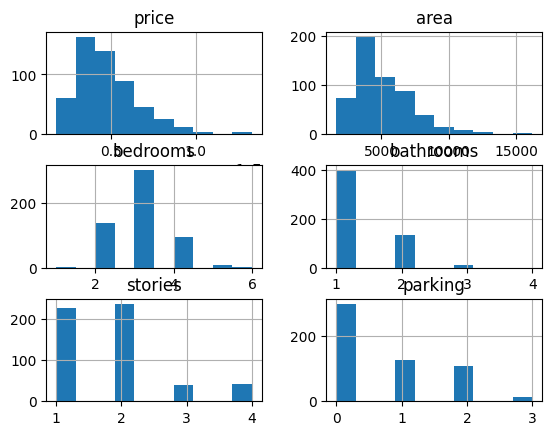

In [6]:
# plot the distribution of the data
data.hist()
plt.show()



# Feature Engineering

Data Preprocessing allows us to transform our data into a form that our model can understand. In our case, we need to transform the categorical data into numerical data. We do this by mapping the categorical data to numerical data.

In [7]:
# get the categorical data 
categorical_data = data.select_dtypes(include=['object'])
numerical_data = data.select_dtypes(include=['float64', 'int64'])

categorical_data.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [8]:
# change all categorical to numerical values
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 1, 'unfurnished': 0, 'semi-furnished': 2})


In [9]:
# see the new data 
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


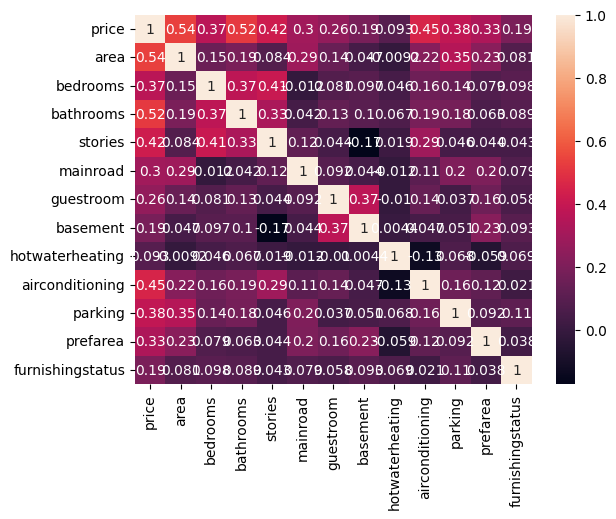

In [10]:
# plot the correlation of the data 
sns.heatmap(data.corr(), annot=True)
plt.show()


# Extract Features and Target Variables

In this section, we will split our data into features and target variables. The features will be all the columns except the 'price' column, and the target variable will be the 'price' column.

In [11]:
# first get the features and target variables
X = data.drop('price', axis=1)
y = data['price']


# Normalize numerical values

We need to normalize our numerical values so that they are in a similar range. We can do this by using the MinMaxScaler. 

In [12]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Train-Test Split

In this section, we will split our data into training and testing sets. We will use 80% of the data for training and 20% for testing. We will also use 80% of the data for training and 20% for testing.

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.3)

In [14]:
X_train.shape

(381, 12)

# Building the Neural Network

we shall use the Linear Regression model to predict the price of a house.

In [15]:
# Train the regression model
Model = LinearRegression()

# Training the Model

In this section, we will train our model. We will use the fit method to train the model.

In [16]:
# Train the model
history = Model.fit(X_train, y_train)

In [17]:


# make some Prediction in the model
y_pred = Model.predict(X_test)

# plot the predicted values with the test values
mean_abo_err = mean_absolute_error(y_test, y_pred)
print(mean_abo_err)

# mean error score
mean_error_score = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_error_score)


# print the model score to predict the values
print(Model.score(X_test, y_test) * 100)



831172.7114429992
911.6867397538473
66.13962892810574


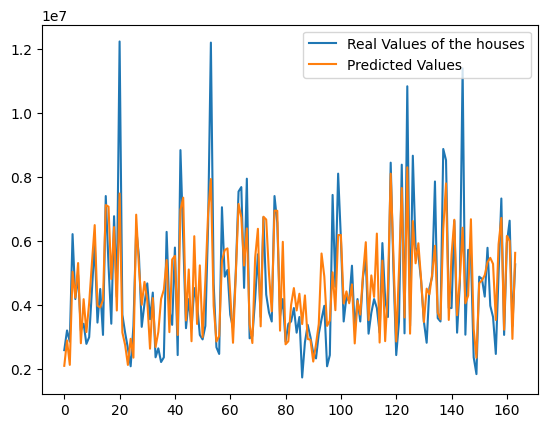

In [18]:
# the values of the y_test_values
y_test_price = y_test.values.flatten()

# plots
plt.plot(y_test_price, label='Real Values of the houses')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [19]:
# import the needed files 

# to install the pickle you need to pip install pickle-mixin 
# this helps you prevent an error you might get just running pip install pickle 

import pickle as pk

In [20]:

#  using the pickle module to save this model in the current folder

# Saving model to pickle file
with open("./Model.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pk.dump(Model, file) 


In [21]:
# nake a prediction for one house just
row_index = 20
single_row = X.iloc[[row_index]]
new_value = Model.predict(single_row)
print(single_row)

# first prediction of one house
print("another value", new_value)


# Alternatively, if you want to make a
another_value = Model.predict([[7420, 4, 2, 2, 3, 1, 0, 0, 1, 1, 1, 1]])

print("Price of the hosue:", f'{another_value} dollars')

    area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
20  4320         3          1        2         1          0         1   

    hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
20                1                0        2         0                 2  
another value [1.47171643e+10]
Price of the hosue: [2.52722706e+10] dollars


/usr/local/Caskroom/miniconda/base/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [22]:
%pip install asyncio uvicorn fastapi pydantic

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import asyncio
import uvicorn
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field

app = FastAPI()

class HouseRequest(BaseModel):
    area: int = Field(gt=0, lt=100000)
    bedrooms: int = Field(gt=-1, lt=10000)
    bathrooms: int = Field(gt=-1, lt=10000)
    stories: int = Field(gt=-1, lt=10000)
    mainroad: int = Field(gt=-1, lt=4)
    guestroom: int = Field(gt=-1, lt=4)
    basement: int = Field(gt=-1, lt=4)
    hotwaterheating: int = Field(gt=-1, lt=4)
    airconditioning: int = Field(gt=-1, lt=4)
    parking: int = Field(gt=-1, lt=4)
    prefarea: int = Field(gt=-1, lt=4)
    furnishingstatus: int = Field(gt=-1, lt=4)
    is_done: str = Field(gt=-1, lt=4)    


@app.get("/class")
async def get_greet():
    return {"Message": "Hello Class"}

@app.get("/", status_code=status.HTTP_200_OK)
async def get_hello():
    return {"hello": "world"}

@app.post('/predict', status_code=status.HTTP_200_OK)
async def make_prediction(house_request: HouseRequest):
    try:
        single_row = [[
            house_request.area,
            house_request.bedrooms,
            house_request.bathrooms,
            house_request.stories,
            house_request.mainroad,
            house_request.guestroom,
            house_request.basement,
            house_request.hotwaterheating,
            house_request.airconditioning,
            house_request.parking,
            house_request.prefarea,
            house_request.furnishingstatus
        ]]
        
        # load the model
        with open("./Model.pkl", "rb") as file:
            model = pk.load(file)
        
        # make a prediction for one house just
        prediction = model.predict(single_row)
        return {"prediction": prediction[0]}
    except:
        raise HTTPException(status_code=500, detail="Something went wrong.")



if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [5331]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:61227 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:61227 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:61227 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:61500 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:63073 - "GET /class HTTP/1.1" 200 OK
INFO:     127.0.0.1:63637 - "GET /class HTTP/1.1" 200 OK
